#### About Project
The goal of this project is to apply principal component analysis and build a positioning map for the car brands, where the number of attributes exceed the number of brands (p > N). Infinity is the focal brand. We recommend what Infinity should do to improve the car's design according to the brand map

#### Positioning Map
Poisitioning Map is a visual representation of brands in attribute space.
It informs managers which brands they compete with more strongly than others.<br>
Proximity on the map means Competition. Therefore, the goal is to stay apart from neighboring brands (differentiated, distinctive).

In [1]:
library(glmnet)
library('MASS')
library(shape)

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"Loaded glmnet 3.0-2



#### 1. 
- use eigen decomposition to find the principle components.
- Assign names to the principal components based on the dominant weights (the values of eigenvector > 0.3). 
- Use the names to label the axes of the brand map.

In [2]:
data=read.csv("Cars_Data.csv", header=T)    # read csv file and label the data as "data"
summary(data)

      Brands    Attractive        Quiet         Unreliable     Poorly.Built  
 Audi    :1   Min.   :3.900   Min.   :2.800   Min.   :2.000   Min.   :1.600  
 BMW     :1   1st Qu.:4.000   1st Qu.:3.525   1st Qu.:2.975   1st Qu.:2.225  
 Eagle   :1   Median :4.900   Median :4.500   Median :3.700   Median :2.800  
 Ford    :1   Mean   :4.780   Mean   :4.410   Mean   :3.420   Mean   :3.090  
 Honda   :1   3rd Qu.:5.525   3rd Qu.:5.150   3rd Qu.:3.975   3rd Qu.:4.275  
 Infinity:1   Max.   :5.700   Max.   :6.300   Max.   :4.300   Max.   :4.400  
 (Other) :4                                                                  
  Interesting        Sporty      Uncomfortable       Roomy      
 Min.   :3.300   Min.   :3.800   Min.   :2.400   Min.   :3.300  
 1st Qu.:3.450   1st Qu.:4.150   1st Qu.:3.225   1st Qu.:3.600  
 Median :3.900   Median :4.900   Median :3.600   Median :3.900  
 Mean   :4.020   Mean   :4.830   Mean   :3.530   Mean   :4.140  
 3rd Qu.:4.225   3rd Qu.:5.175   3rd Qu.:4.000   3r

In [5]:
y=data[,17]
x=as.matrix(data[,2:16])

In [6]:
# Eigen decomposition 
xcor = cor(x)
out = eigen(xcor)  # eigen decomposition of correlation matrix. Yields eiganvalues and eigenvectors
va = out$values		# eigenvalues
ve = out$vectors	# eigenvectors. Each column is an eigenvector and has a unit length. 	

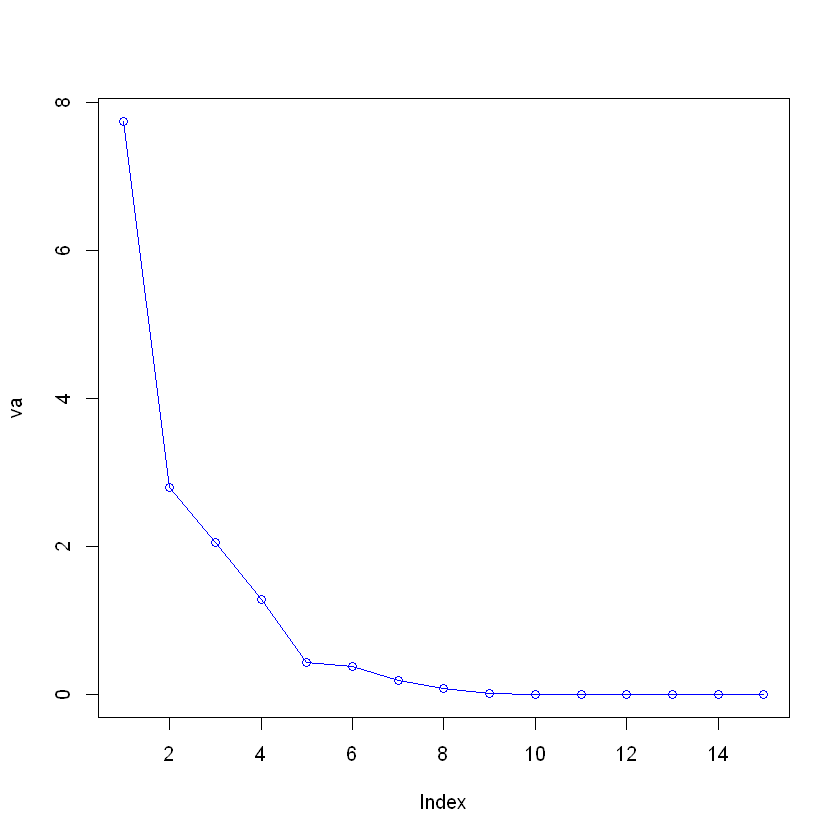

In [7]:
# Scree Plot		# to decide how many components to keep. Look for "elbow" in the scree plot
plot(va, type = "o", col = "blue")

In [9]:
# eigenvector provides the weights to create new variables (aka loadings)
w1 = ve[,1]			
w2 = ve[,2]	
# keep 2 components according to the plot above
important_attribute<-data.frame(ve[,1:2],row.names = colnames(data[,2:16]))
colnames(important_attribute)=c("w1","w2")

In [17]:
# identify dominant weights (the values of eigenvector > 0.3)
important_attribute[abs(important_attribute$w1)>0.3,]
important_attribute[abs(important_attribute$w2)>0.3,]

,w1,w2
Attractive,-0.3262814,0.24406301
Quiet,-0.3173818,-0.01310558
Poorly.Built,0.3319244,-0.16061557
Prestige,-0.3322855,0.06323511
Successful,-0.3155394,0.19579257


,w1,w2
Unreliable,0.2344774,-0.4011014
Sporty,0.2079926,0.4288285
Roomy,-0.2472063,-0.3789204
Easy.Service,0.1852832,0.4279673


In [19]:
# create principal components
z1_PoorlyBuilt_Attractive_Quiet_Prestige_Successful = x %*% w1
z2_Sporty_EasyService_Unrealiable_Roomy = x %*% w2
# flip z1's sign to make the z1-dimension as a desirable benefit
z = cbind(-z1_PoorlyBuilt_Attractive_Quiet_Prestige_Successful,z2_Sporty_EasyService_Unrealiable_Roomy)

Name z1 as Luxury and z2 as Utility. Therefore, the two attribute dimention of the positioning map is Luxury and Utility

#### 2.
- Run Principal Component Regression: regress overall preference on two princial components, utility and luxury.
- The coefficients of utility of luxury decides the position of the brand on the map.
- Iso-prefence line is a line in the attribute space where preference remains constant
- The ideal vector is a line perpendicular to the iso-preference lines. It shows the direction of increasing preferences. 

In [26]:
# principal component regression 
linreg=lm(y~z)
summary(linreg)


Call:
lm(formula = y ~ z)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4455 -0.1693 -0.0614  0.1630  0.7292 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.63050    0.45268  12.438  5.0e-06 ***
z1           0.56263    0.05280  10.657  1.4e-05 ***
z2          -0.04275    0.10829  -0.395    0.705    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3821 on 7 degrees of freedom
Multiple R-squared:  0.9426,	Adjusted R-squared:  0.9262 
F-statistic: 57.47 on 2 and 7 DF,  p-value: 4.532e-05


In [27]:
# Ideal Vector 										
b1=as.vector(coef(linreg)[2])
b2=as.vector(coef(linreg)[3])

slope.iso.preference = - b1/b2					
slope.ideal.vector = b2/b1 						

angle.iso.preference = atan(slope.iso.preference)*180/pi	
angle.ideal.vector = atan(slope.ideal.vector)*180/pi

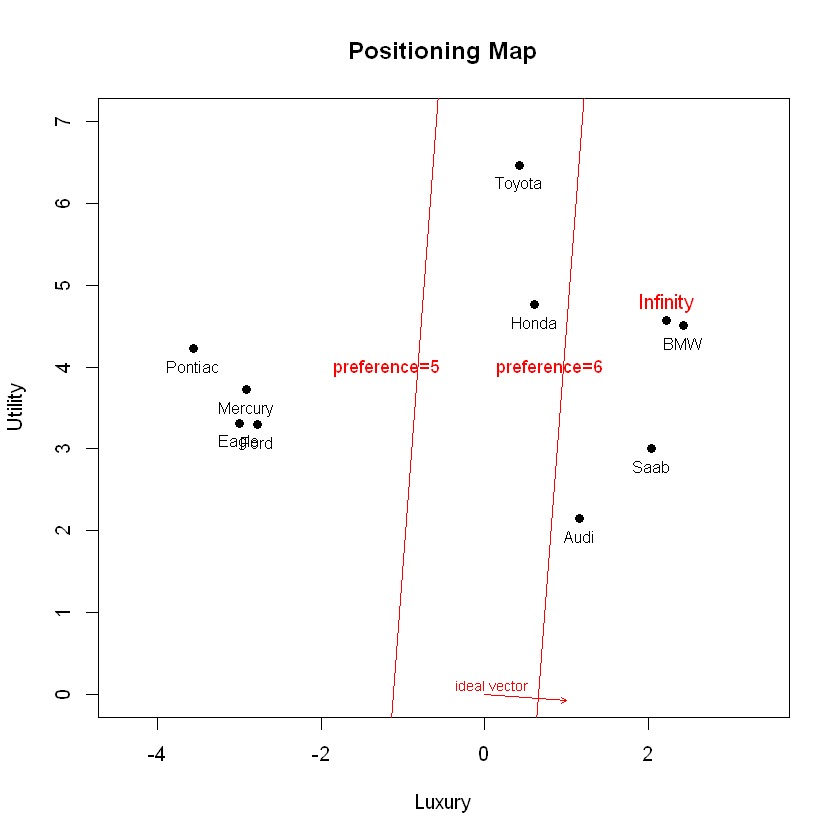

In [30]:
# plot positioning map
plot(z[,1],z[,2], main="Positioning Map", 
     xlab="Luxury", ylab="Utility",
     xlim = c(-4,3), ylim = c(0,7),pch=16, col="black", asp=1)   
abline(a = (5-coef(linreg)[1])/coef(linreg)[3] , b = slope.iso.preference , col = "red")
abline(a = (6-coef(linreg)[1])/coef(linreg)[3] , b = slope.iso.preference , col = "red") 
text(-2,4, "preference=5", cex=0.9, pos=4, col="red")
text(0,4, "preference=6", cex=0.9, pos=4, col="red") # label two iso-preference lines
text(z[2:10,1],z[2:10,2], data$Brands[2:10], cex=0.8, pos=1, col="black")
text(z[1,1],z[1,2], data$Brands[1], cex=1, pos=3, col="red") # add labels for each brand
x1_start = 0
x2_start = 0
dx1 = 1
x1_end = x1_start + dx1
x2_end = x2_start + dx1*slope.ideal.vector
arrows(x1_start, x2_start, x1_end, x2_end, col ="red",length=0.05,lwd = 1)
text(-0.5,0.1, "ideal vector", cex=0.7, pos=4, col="red") 

#### Recommendation for Infinity
Ideal vector points towards where luxury increases and utility slightly decreases, which means
consumers value the attribute “Luxury” more than “Utility”. On the map, in terms of “Luxury”,
Infinity is only second to BMW while it is considered less “useful” than Toyota and Honda. Notably,
Infinity lies very close to BMW but with less overall consumer preference. In improving its design,
Infinity should use a strategy that both increases its consumer preference and differentiates itself
from its closest competitor BMW. Specifically, Infinity should aim to increase its luxury (more
attractive, quiet, nicely built, prestigious and successful) for higher consumer preference while
also increasing its utility (more reliable, sporty, easier service and less roomy) for differentiation.

#### Bootstrap

[1] -5.658521

[1] "The 90 percent CI for the angle of the ideal vector is (-16.95, 7.23)."

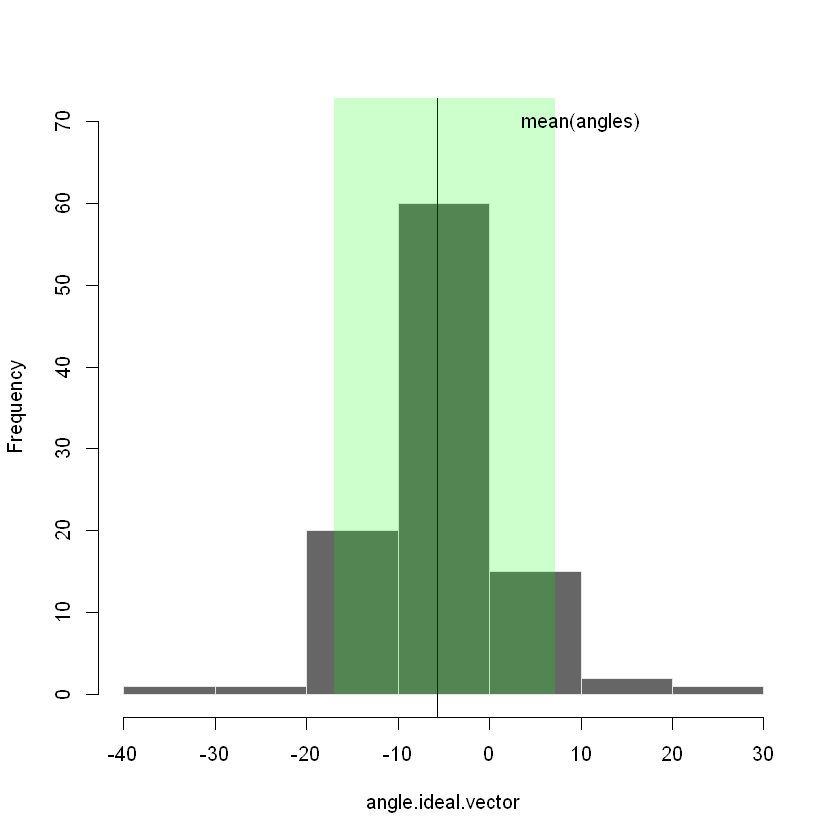

In [31]:
set.seed(0229)

angles<-c()
n <- length(y)
for(bootstrap in 1:100){
  samp_rows <- sample(1:n,n,replace=TRUE)
  linreg=lm(y[samp_rows]~z[samp_rows,])								# Fit linear regression with those predictors 

  # Ideal Vector 									
  b1=as.vector(coef(linreg)[2])
  b2=as.vector(coef(linreg)[3])
  slope.ideal.vector = b2/b1 						
  angle.ideal.vector = atan(slope.ideal.vector)*180/pi
  angles <- c(angles,angle.ideal.vector)
  }
  
# plot angles
hist(angles, col="grey40", border="grey90", main="",xlab="angle.ideal.vector", ylim = c(0, 70))
# mark the mean
abline(v=mean(angles))
sd_angles<-sd(angles)
polygon(x=c(rep(quantile(angles,0.05),2),rep(quantile(angles,0.95),2)),
        y=c(0,1000,1000,0), col=rgb(0,1,0,.2), border=NA)
text(10,70,"mean(angles)")

mean(angles)
left <- quantile(angles,0.05)
right <- quantile(angles,0.95)
sprintf("The 90 percent CI for the angle of the ideal vector is (%.2f, %.2f).", left, right)
